### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/freelancesr18/LinearRegression/master/CarPrice_Assignment.csv')
data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

For Linear Regression, what are the __features__?

- symboling, wheelbase, carwidth, carheight, enginesize, boreratio, stroke, compressionratio, peakrpm, citympg, highwaympg

What is the __response__?

- price

In [5]:
# we don't need the ID and other object type variables. so we can drop the car_ID col

data.drop(['car_ID', 'CarName', 'fueltype' , 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], inplace=True, axis = 1) 


In [6]:
print (data.select_dtypes(exclude='object'))

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
5            2       99.8      177.3      66.3       53.1        2507   
6            1      105.8      192.7      71.4       55.7        2844   
7            1      105.8      192.7      71.4       55.7        2954   
8            1      105.8      192.7      71.4       55.9        3086   
9            0       99.5      178.2      67.9       52.0        3053   
10           2      101.2      176.8      64.8       54.3        2395   
11           0      101.2      176.8      64.8       54.3        2395   
12           0      101.2      176.8      64.8     

In [7]:
data.describe()

#price - is it normally distributed?
# mean = 13276.71
# med = 10295.00

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


__Distribution of Features__

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


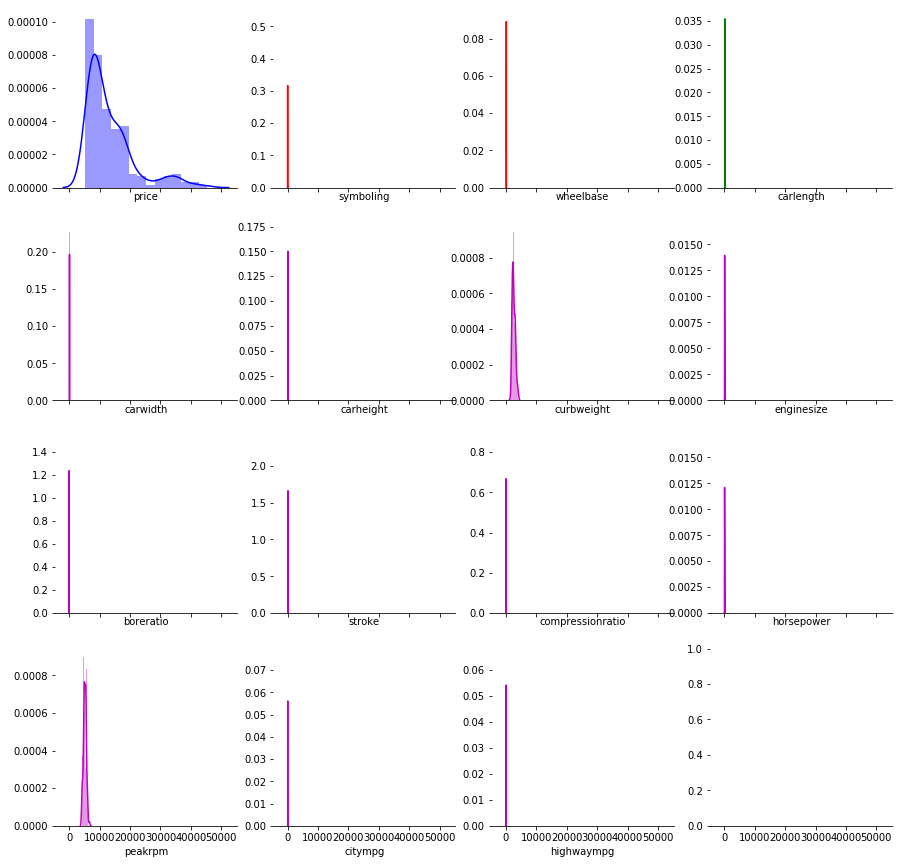

In [8]:
f, axes = plt.subplots(4, 4, figsize=(15, 15), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

#wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg

sns.distplot(data.price, color="b", ax=axes[0, 0])
sns.distplot(data.symboling, color="r", ax=axes[0, 1])
sns.distplot(data.wheelbase, color="r", ax=axes[0, 2])
sns.distplot(data.carlength, color="g", ax=axes[0, 3])
sns.distplot(data.carwidth, color="m", ax=axes[1, 0])
sns.distplot(data.carheight, color="m", ax=axes[1, 1])
sns.distplot(data.curbweight, color="m", ax=axes[1, 2])
sns.distplot(data.enginesize, color="m", ax=axes[1, 3])
sns.distplot(data.boreratio, color="m", ax=axes[2, 0])
sns.distplot(data.stroke, color="m", ax=axes[2, 1])
sns.distplot(data.compressionratio, color="m", ax=axes[2, 2])
sns.distplot(data.horsepower, color="m", ax=axes[2, 3])
sns.distplot(data.peakrpm, color="m", ax=axes[3, 0])
sns.distplot(data.citympg, color="m", ax=axes[3, 1])
sns.distplot(data.highwaympg, color="m", ax=axes[3, 2])




__Observations__<br/>
Target Variabe 'Price' seems to be right skewed.<br/>
All other Explanatory Variables seems to have a normal distribution

In [9]:
data.skew()


symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

Text(0.5, 0, 'Price')

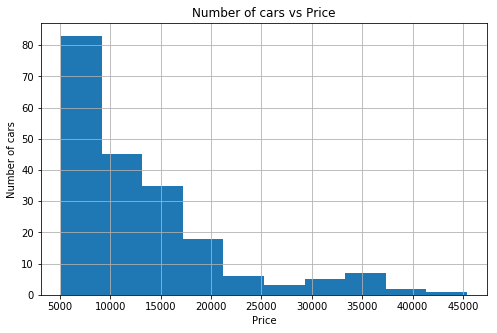

In [10]:
data.hist('price',figsize=(8,5))
plt.title('Number of cars vs Price')
plt.ylabel('Number of cars')
plt.xlabel("Price")

### ASSUMPTION 1 - TARGET VARIABLE SHOULD BE NORMALLY DISTRIBUTED

__Check__

1. Plot histogram
2. df.describe()
3. df.skew()

__To Correct for Not Normal__

1. Log (Target Variable)
2. Sqrt (Target Variable)


__In this case since price is skewed, applying Log(Target Variable) to make it normalized__

Text(0.5, 0, 'log(Price)')

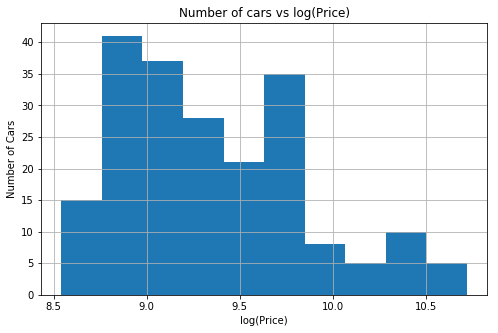

In [11]:
data['price'] = np.log(data['price'])

data.hist('price',figsize=(8,5))
plt.title('Number of cars vs log(Price)')
plt.ylabel('Number of Cars')
plt.xlabel("log(Price)")

In [12]:
data.skew()

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               0.672889
dtype: float64

In [13]:
data.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.088717
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.629401
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.767864
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.802544
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.162798
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.891237
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.831985
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.610565
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.097992
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.085144


#### Observations
__price__ seems to be right skewed. Other attributes seem to have an uniform distribution.


### Is there a relationship between price and the rest of the explanatory variables?


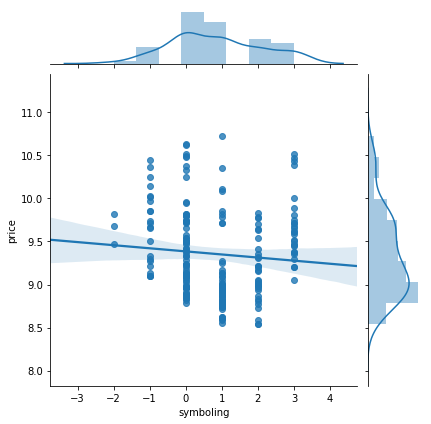

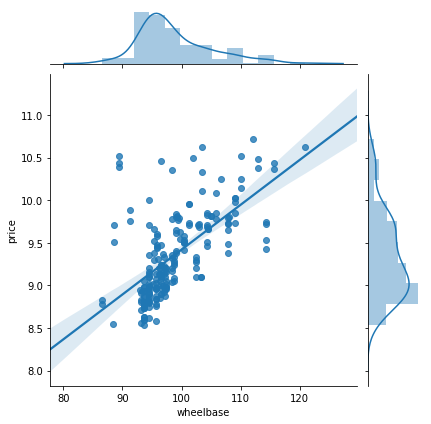

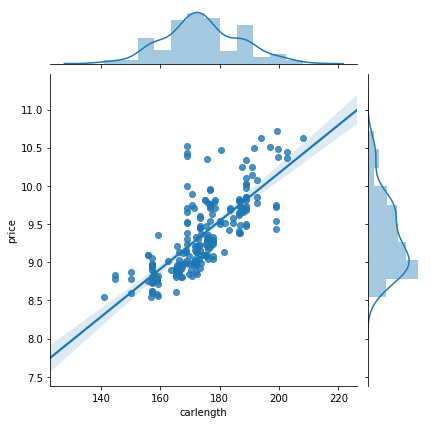

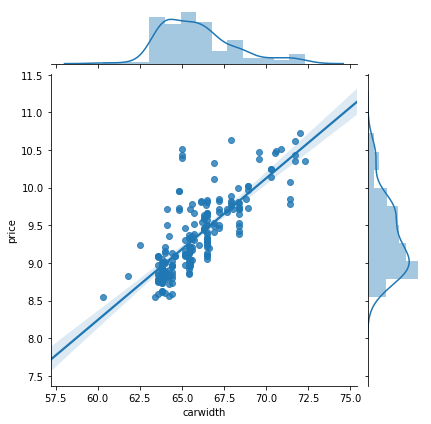

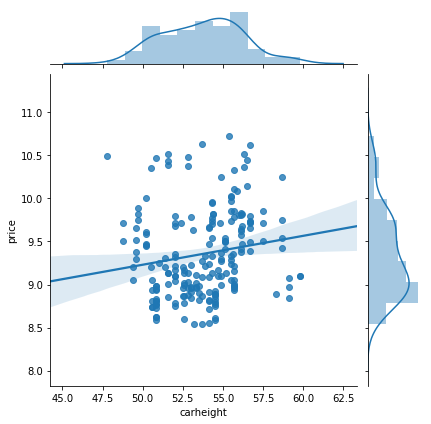

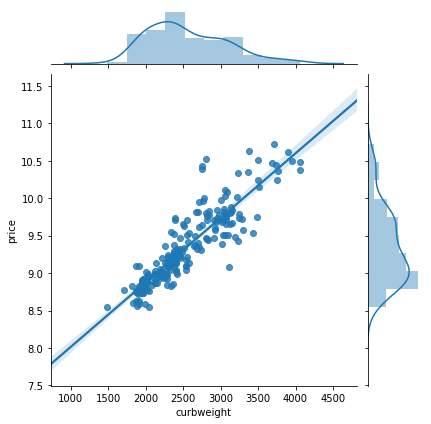

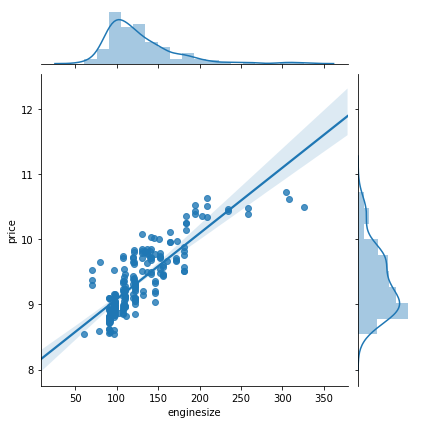

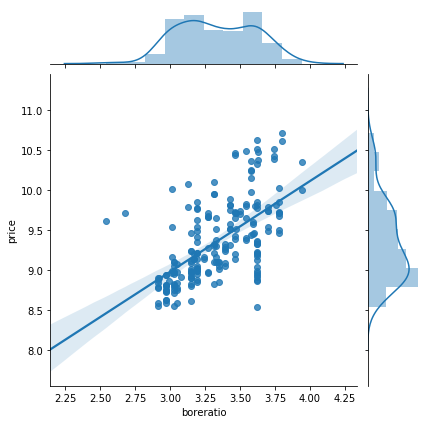

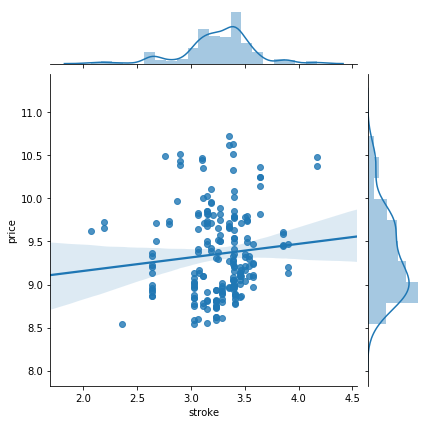

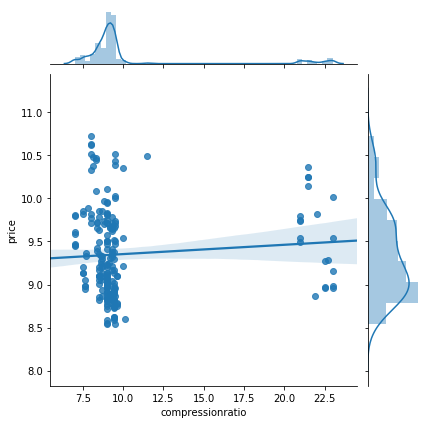

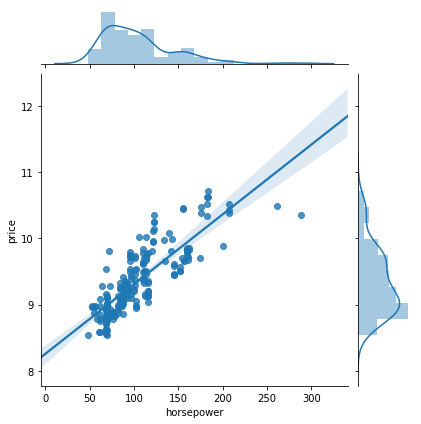

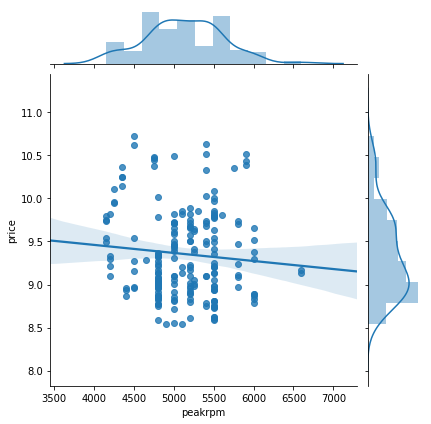

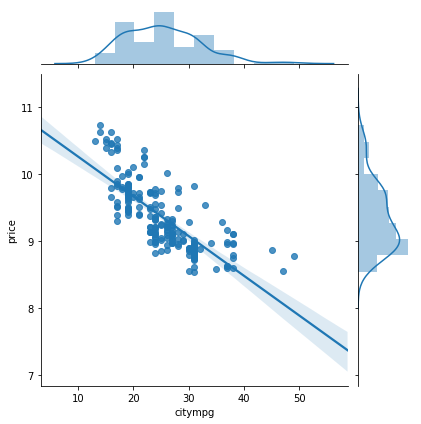

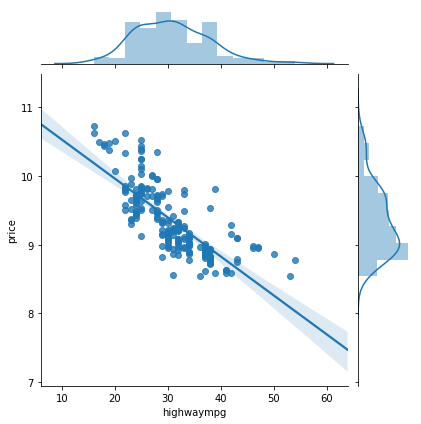

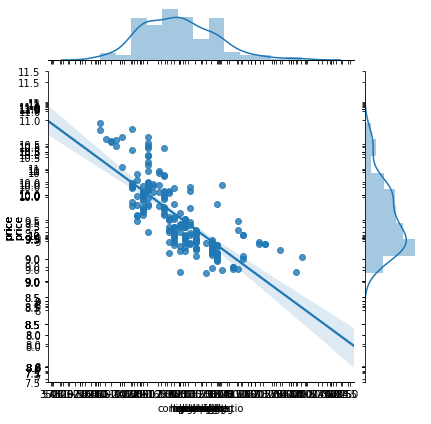

In [14]:
#wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, 
#horsepower, peakrpm, citympg, highwaympg

JG1 = sns.jointplot("symboling", "price", data=data, kind='reg')
JG2 = sns.jointplot("wheelbase", "price", data=data, kind='reg')
JG3 = sns.jointplot("carlength", "price", data=data, kind='reg')
JG4 = sns.jointplot("carwidth", "price", data=data, kind='reg')
JG5 = sns.jointplot("carheight", "price", data=data, kind='reg')
JG6 = sns.jointplot("curbweight", "price", data=data, kind='reg')
JG7 = sns.jointplot("enginesize", "price", data=data, kind='reg')
JG8 = sns.jointplot("boreratio", "price", data=data, kind='reg')
JG9 = sns.jointplot("stroke", "price", data=data, kind='reg')
JG10 = sns.jointplot("compressionratio", "price", data=data, kind='reg')
JG11 = sns.jointplot("horsepower", "price", data=data, kind='reg')
JG12 = sns.jointplot("peakrpm", "price", data=data, kind='reg')
JG13 = sns.jointplot("citympg", "price", data=data, kind='reg')
JG14 = sns.jointplot("highwaympg", "price", data=data, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2, JG3, JG4, JG5, JG6, JG7, JG8, JG9, JG10, JG11, JG12, JG13, JG14]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)
        

__Observation__<br/>
Price and symboiling is __not highly correlated__<br/>
Price and carheight is __not highly correlated__<br/>
Price and stroke is __not highly correlated__<br/>
Price and compressionratio is __not highly correlated__<br/>
Price and peakrpm is __not highly correlated__<br/>

### Visualising Pairwise correlation

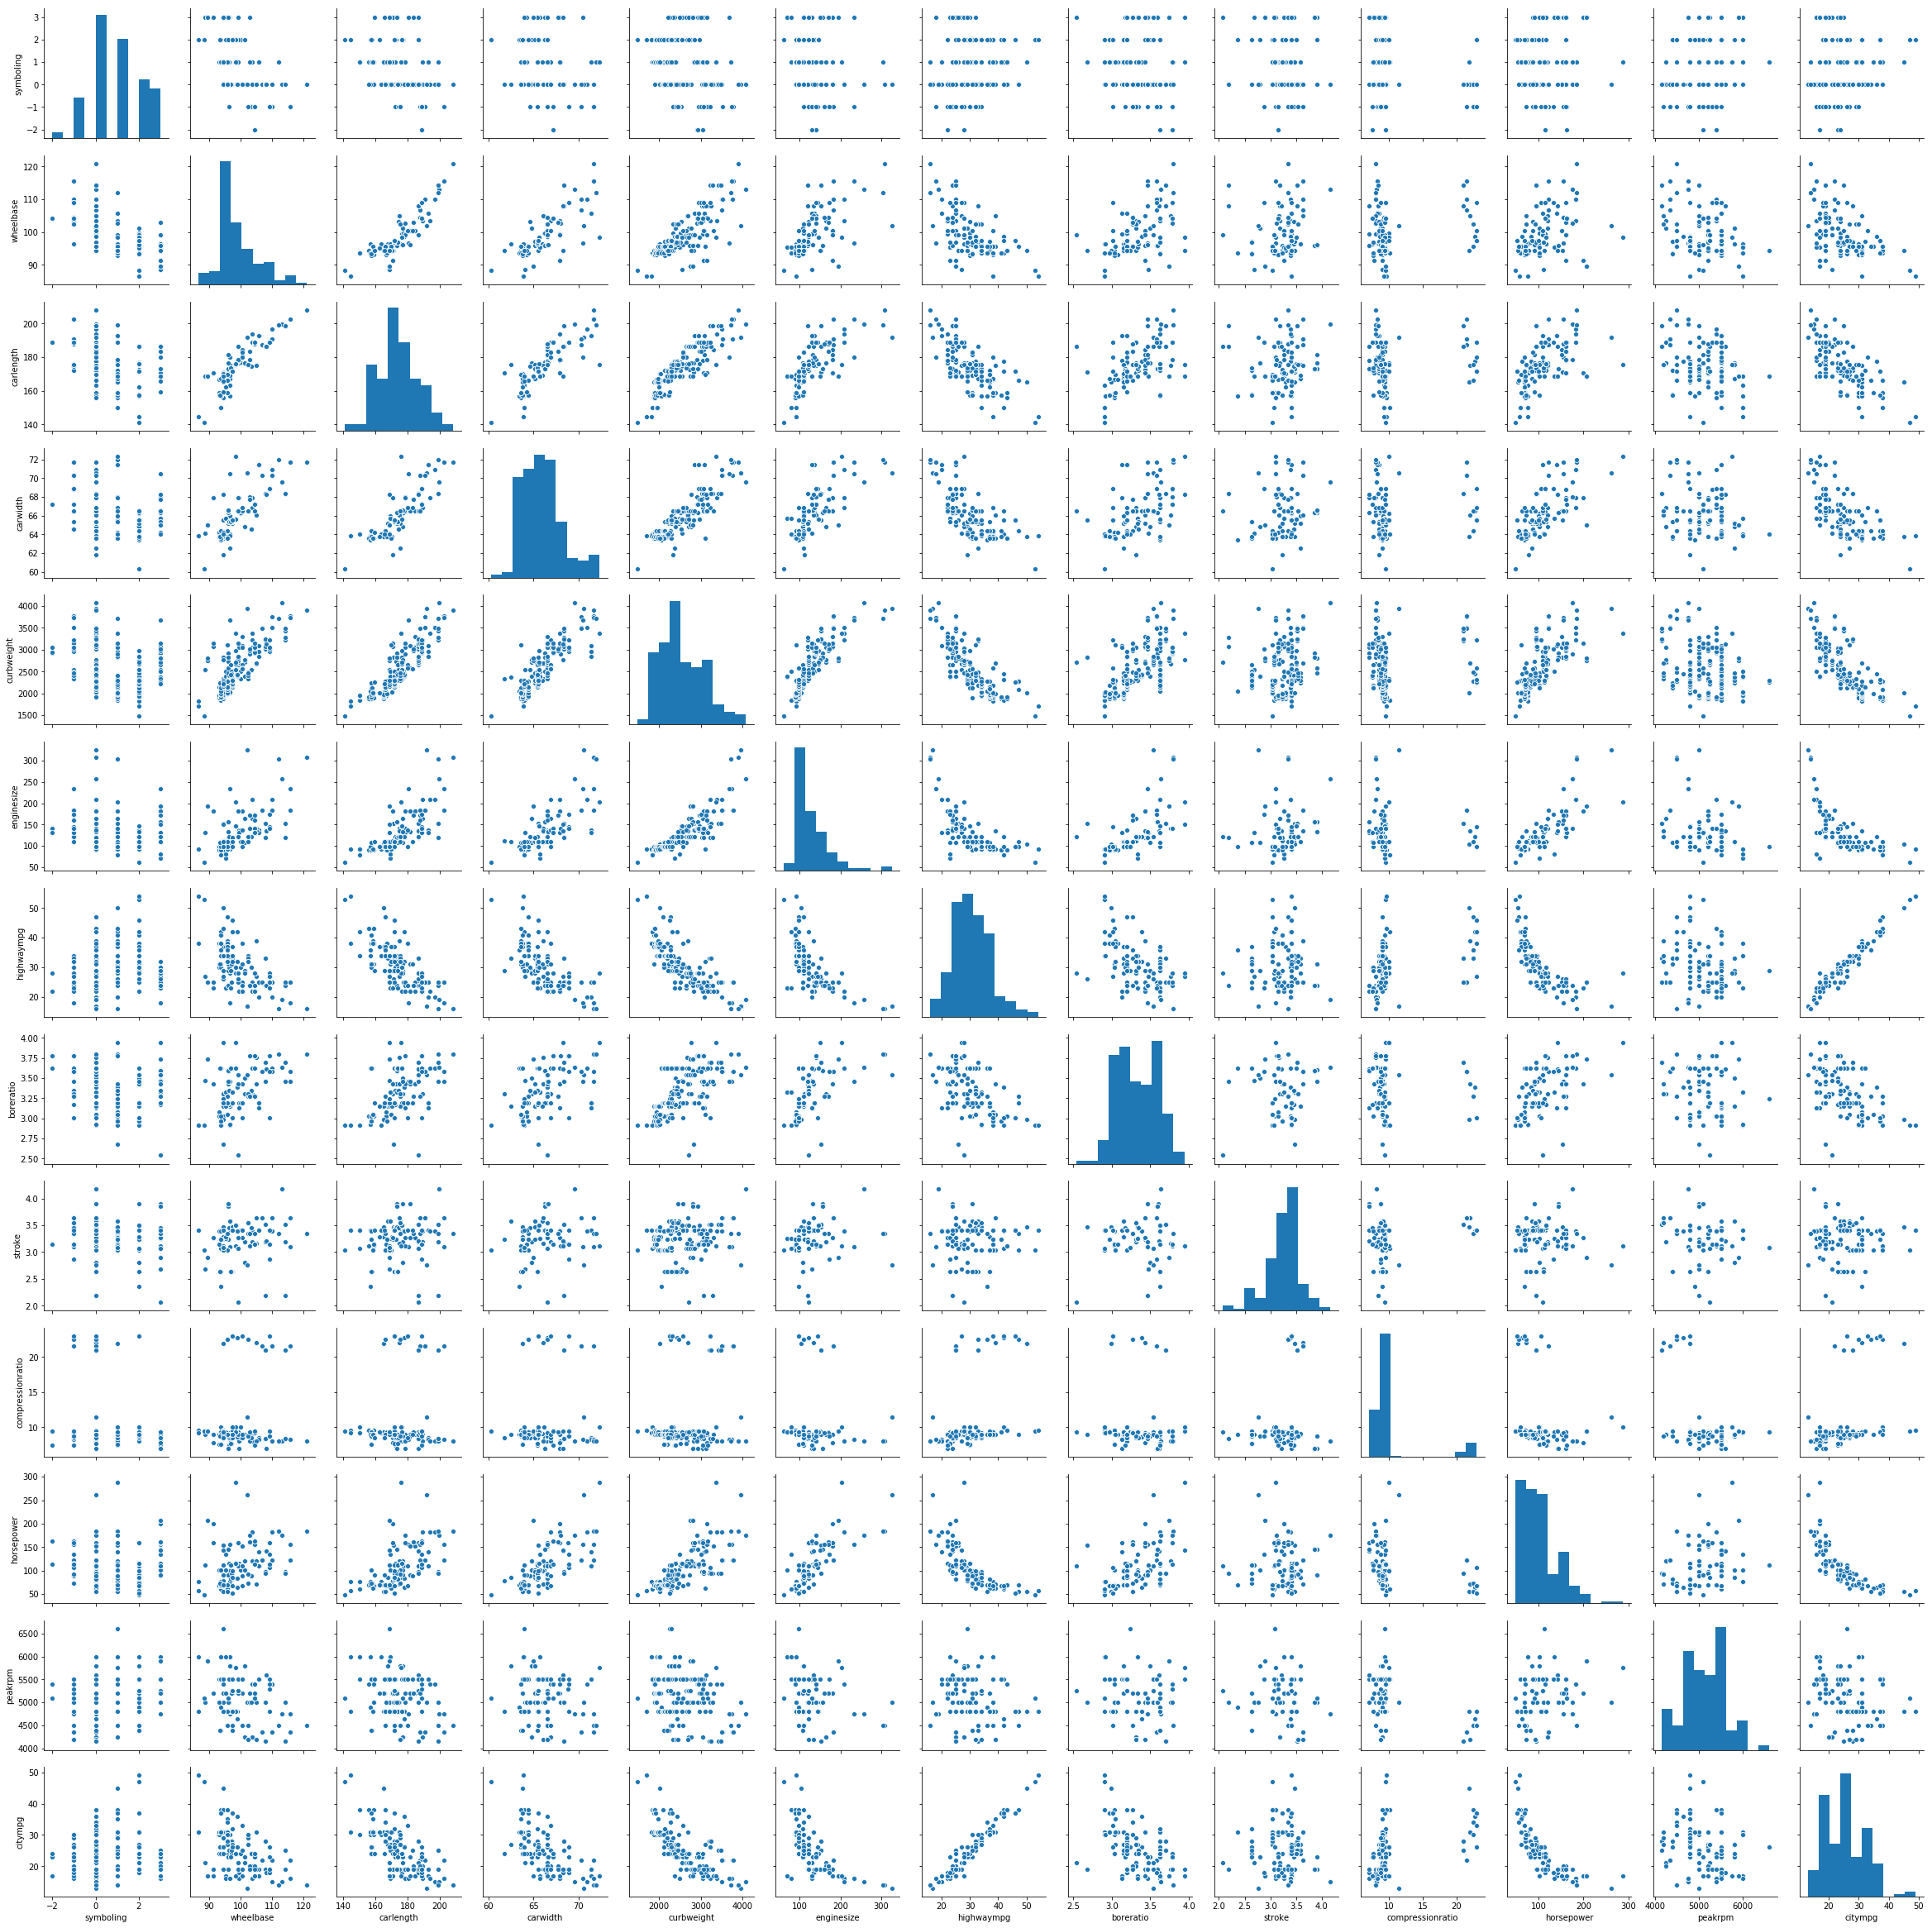

In [15]:
#symboling, wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, 
#horsepower, peakrpm, citympg, highwaympg, 

sns.pairplot(data, vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'highwaympg', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg'])


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


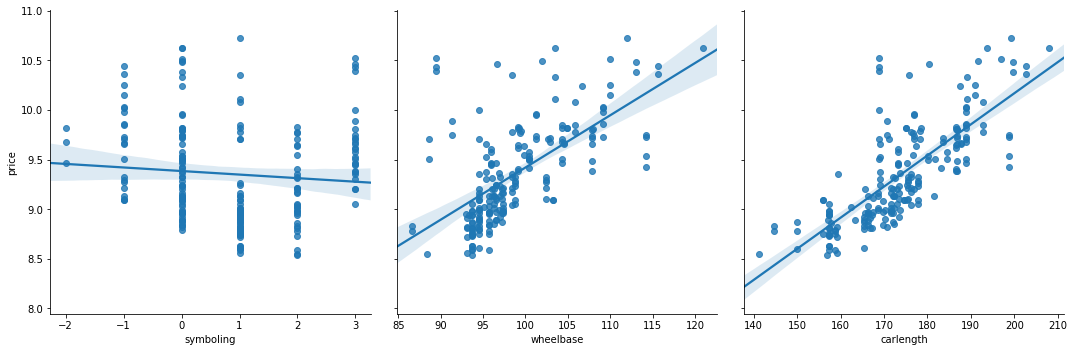

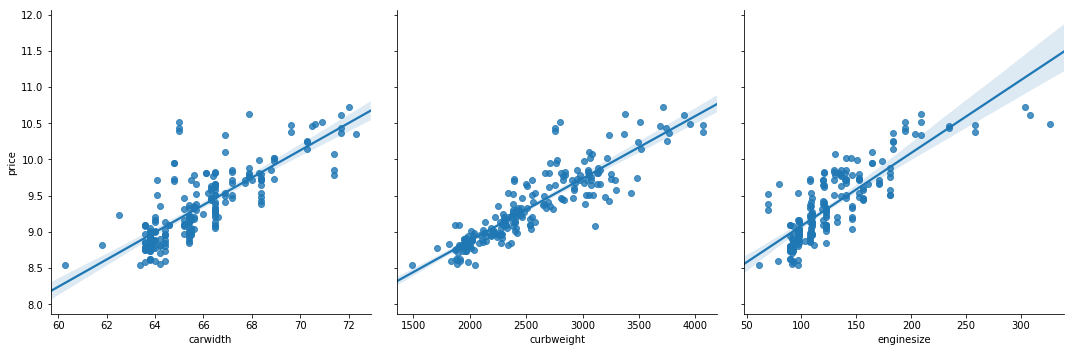

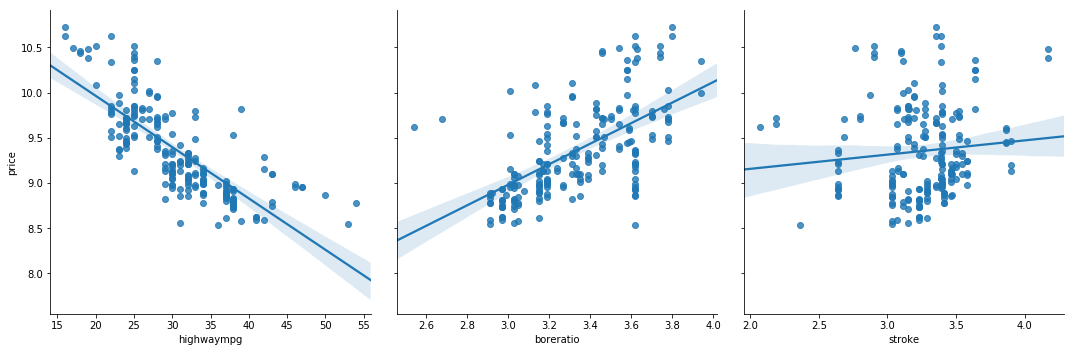

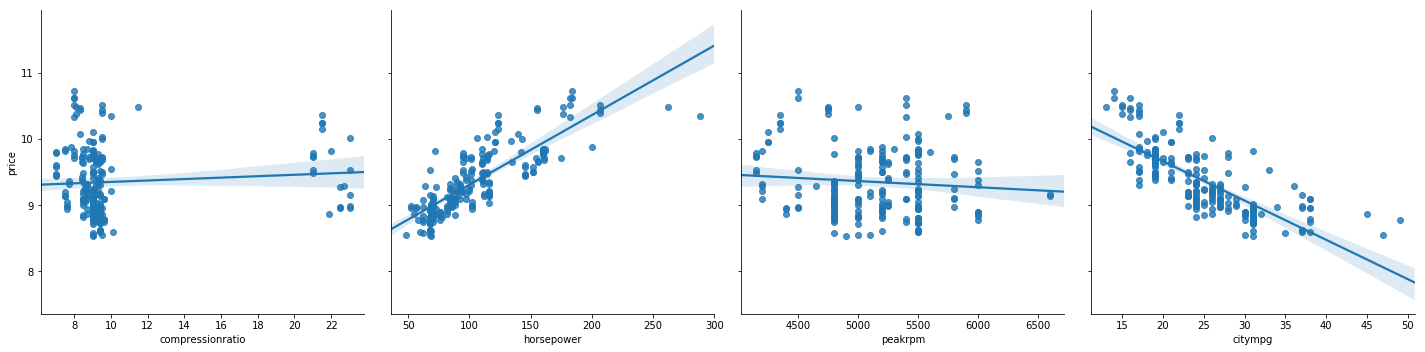

In [16]:
#sns.pairplot(data, x_vars=['symboling', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'highwaympg', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg'], y_vars='price', size=10, aspect=1, kind='reg')
sns.pairplot(data, x_vars=['symboling', 'wheelbase', 'carlength'], y_vars='price', size=5, aspect=1, kind='reg')
sns.pairplot(data, x_vars=['carwidth', 'curbweight', 'enginesize'], y_vars='price', size=5, aspect=1, kind='reg')
sns.pairplot(data, x_vars=['highwaympg', 'boreratio', 'stroke'], y_vars='price', size=5, aspect=1, kind='reg')
sns.pairplot(data, x_vars=['compressionratio', 'horsepower', 'peakrpm', 'citympg'], y_vars='price', size=5, aspect=1, kind='reg')


__Observation__

__Strong relationship__ between carwidth and price <br/>
__Strong relationship__ between curbweight and price <br/>
__Strong relationship__ between enginesize and price <br/>
<br/>
__Weak relationship__ between wheelbase and price <br/>
__Weak relationship__ between carlength and price <br/>
__Weak relationship__ between highwaympg and price <br/>
__Weak relationship__ between boreratio and price <br/>
__Weak relationship__ between horsepower and price <br/>
__Weak relationship__ between citympg and price <br/>
<br/>
__Very weak to no relationship__ between symboling and price <br/>
__Very weak to no relationship__ between stroke and price <br/>
__Very weak to no relationship__ between symboling and price <br/>
__Very weak to no relationship__ between compressionratio and price <br/>
__Very weak to no relationship__ between peakrpm and price <br/>




### Calculating and plotting heatmap correlation

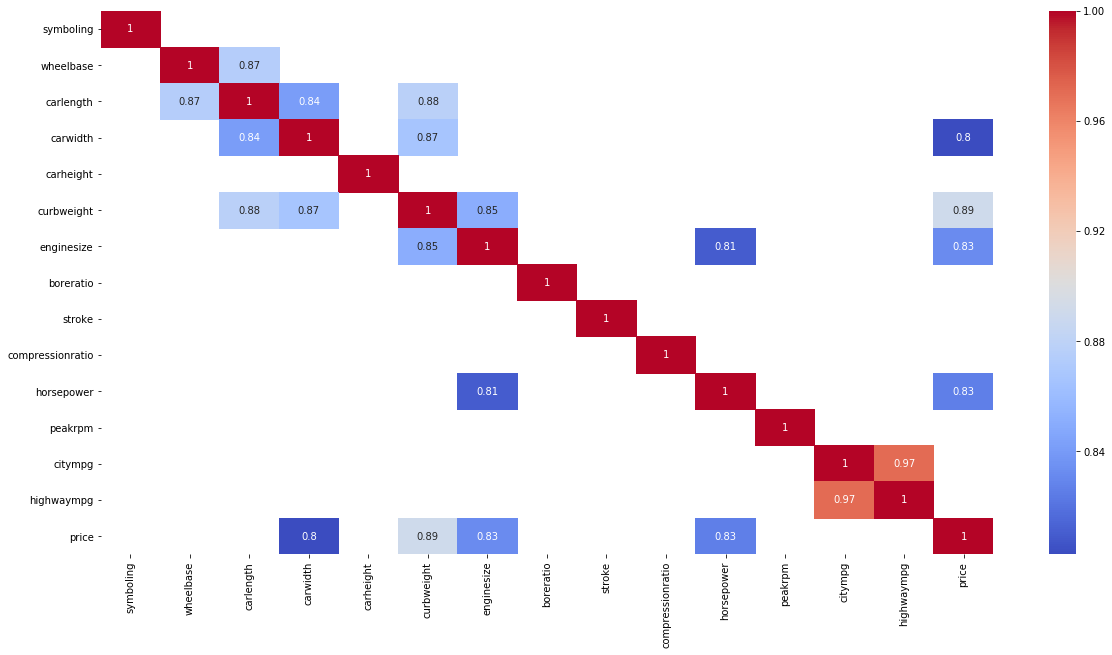

In [17]:
#symboling, wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, 
#horsepower, peakrpm, citympg, highwaympg

plt.figure(figsize = (20,10))
#sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2g')

corr = data.corr()
kot = corr[corr>=.8]
sns.heatmap(kot, cmap="coolwarm", annot=True, fmt='.2g')



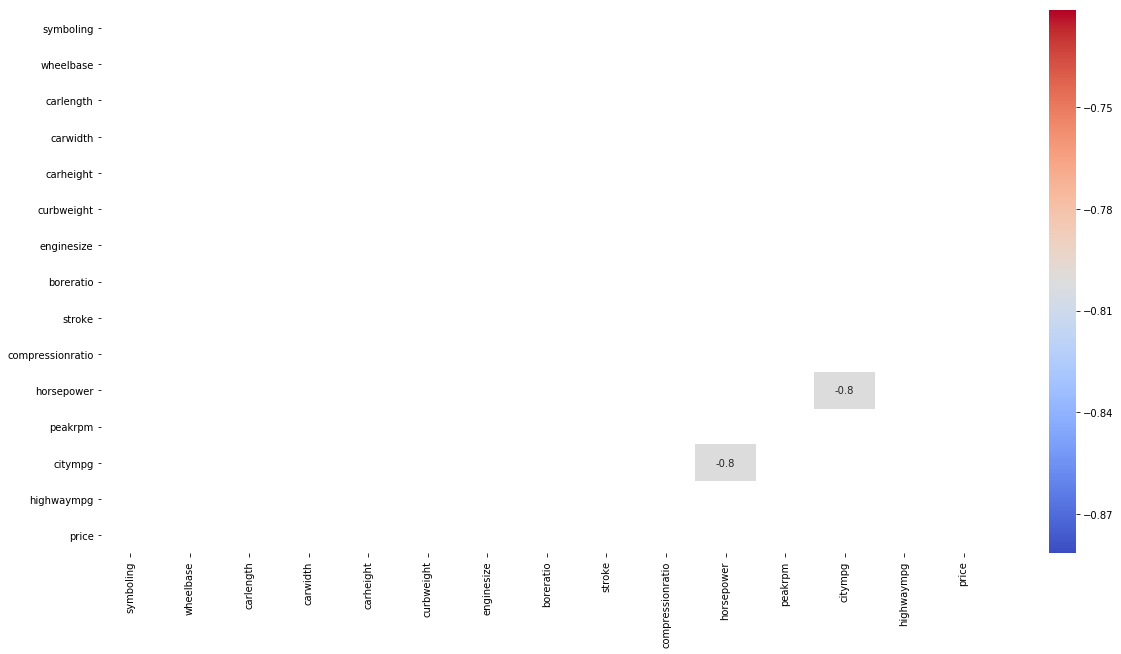

In [18]:
plt.figure(figsize = (20,10))
#sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2g')

corr = data.corr()
kot = corr[corr<=-.8]
sns.heatmap(kot, cmap="coolwarm", annot=True, fmt='.2g')


__Observation__

The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. 
You can observe that the correlation between TV and Sales is highest i.e. 0.78 and then between sales and radio i.e. 0.576.

Correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. 

Variables with strong correlations are mostly probably candidates for model builing.

### ASSUMPTION 3 - CHECK FOR MULTICOLINEARLITY

__Any value between -0.8 and +0.8 is acceptable. If there are values beyond these numbers, we have correct for it by dropping one of the two variables__

In this case, we have corr greater than 0.8 for the following variables
wheelbase and carlength
carwidth and carlength
curbweight and carlength
curbweight and carwidth
curbweight and enginesize
horsepower and enginesize

__We can drop these variables - carlength, curbweight, horsepower__




In [19]:
# We can drop the variables - carlength, curbweight, horsepower

data.drop(['carlength', 'curbweight', 'horsepower'], inplace=True, axis = 1) 

#### Assumptions of Linear Regression

1. There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X¹ is constant, regardless of the value of X¹. An additive relationship suggests that the effect of X¹ on Y is independent of other variables.
2. There should be no correlation between the residual (error) terms. Absence of this phenomenon is known as Autocorrelation.
3. The independent variables should not be correlated. Absence of this phenomenon is known as multicollinearity.
4. The error terms must have constant variance. This phenomenon is known as homoskedasticity. The presence of non-constant variance is referred to heteroskedasticity.
5. The error terms must be normally distributed.

In [20]:
data.head()

,symboling,wheelbase,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg,price
0,3,88.6,64.1,48.8,130,3.47,2.68,9.0,5000,21,27,9.510075
1,3,88.6,64.1,48.8,130,3.47,2.68,9.0,5000,21,27,9.711116
2,1,94.5,65.5,52.4,152,2.68,3.47,9.0,5000,19,26,9.711116
3,2,99.8,66.2,54.3,109,3.19,3.40,10.0,5500,24,30,9.543235
4,2,99.4,66.4,54.3,136,3.19,3.40,8.0,5500,18,22,9.767095


### Preparing X and y using pandas

__Standardization__<br/>
Standardize features by removing the mean and scaling to unit standard deviation.


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data1 = scaler.transform(data)
data = pd.DataFrame(data1)
data.head()


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.743470,-1.690772,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,-0.546059,0.309199
1,1.743470,-1.690772,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,-0.546059,0.709221
2,0.133509,-0.708596,-0.190566,-0.543527,0.604046,-2.404880,0.685946,-0.288349,-0.262960,-0.953012,-0.691627,0.709221
3,0.938490,0.173698,0.136542,0.235942,-0.431076,-0.517266,0.462183,-0.035973,0.787855,-0.186865,-0.109354,0.375179
4,0.938490,0.107110,0.230001,0.235942,0.218885,-0.517266,0.462183,-0.540725,0.787855,-1.106241,-1.273900,0.820606


In [22]:
data.columns = ['symboling', 'wheelbase', 'carwidth', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg', 'price']
data.head()

,symboling,wheelbase,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg,price
0,1.743470,-1.690772,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,-0.546059,0.309199
1,1.743470,-1.690772,-0.844782,-2.020417,0.074449,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,-0.546059,0.709221
2,0.133509,-0.708596,-0.190566,-0.543527,0.604046,-2.404880,0.685946,-0.288349,-0.262960,-0.953012,-0.691627,0.709221
3,0.938490,0.173698,0.136542,0.235942,-0.431076,-0.517266,0.462183,-0.035973,0.787855,-0.186865,-0.109354,0.375179
4,0.938490,0.107110,0.230001,0.235942,0.218885,-0.517266,0.462183,-0.540725,0.787855,-1.106241,-1.273900,0.820606


In [23]:
feature_cols = ['symboling', 'wheelbase', 'carwidth', 'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg']   # create a Python list of feature names
X = data[feature_cols]                                     # use the list to select a subset of the original DataFrame-+

- Checking the type and shape of X.

In [24]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(205, 11)


In [25]:
y = data.price
y.head()

0    0.309199
1    0.709221
2    0.709221
3    0.375179
4    0.820606
Name: price, dtype: float64

- Check the type and shape of y

In [26]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(205,)


### Splitting X and y into training and test datasets.
    

In [27]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [28]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (164, 11)
y_train shape:  (164,)

Test cases as below
X_test shape:  (41, 11)
y_test shape:  (41,)


### Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Interpreting Model Coefficients

In [30]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: -0.016628107060604254
Coefficients: [ 0.02137196 -0.00197793  0.216593    0.05243734  0.44937229 -0.0014819
 -0.08272025  0.25365445  0.10621573 -0.68317563  0.2895077 ]


Its hard to remember the order of the feature names, we so we are zipping the features to pair the feature names with the coefficients

In [31]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)


In [32]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.016628107060604254
symboling 0.021371957277289785
wheelbase -0.0019779250386000114
carwidth 0.21659300034565615
carheight 0.052437337538112035
enginesize 0.44937229403314005
boreratio -0.0014818971178943328
stroke -0.0827202521100987
compressionratio 0.2536544461434098
peakrpm 0.10621572786591336
citympg -0.6831756292614442
highwaympg 0.2895076998405209


__Y = -0.00166 + 0.0213 * symboling - 0.0019 * wheelbase + 0.2165 * carwidth + 0.0524 * carheight +  0.4493 * enginesize - 0.0014 * boreratio - 0.0827 * stroke + 0.2536 * compressionratio +  0.1062 * peakrpm - 0.6831 * citympg + 0.2895 * highwaympg__



### Using the Model for Prediction

In [33]:
y_pred_train = linreg.predict(X_train)  

In [34]:
y_pred_test = linreg.predict(X_test)  # make predictions on the testing set

- We need an evaluation metric in order to compare our predictions with the actual values.

### Model Evaluation

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Squared Error
- Root Mean Squared Error

In [35]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))


RMSE for training set is 0.3603407069781678
RMSE for test set is 0.4223299416825557


### Model Evaluation using Rsquared value

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [36]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8711973486275004 0.86187610412028


In [37]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8087990393000746 0.7362745369656201
